In [66]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd 

## Current Density - Overpotential Plot

In [85]:
#Constants
j0 = 0.00965
alphaa = 0.3
alphac = 0.7
R = 8.314
T = 298 
F = 96485
EEq = 0.771
z = 1
jmax = 600

#Finding Voltage Boundaries
etamax  = (R*T)/(alphaa*z*F)*np.log(jmax/j0)
Eta = np.linspace(-(etamax), etamax, 500)

#Equation
CurrentDensitya = j0 * np.exp((1-alphaa)*z*F*Eta/(R*T))
CurrentDensityc = (-j0 * np.exp(-alphaa*z*F*Eta/(R*T)))
-CurrentDensityc


array([6.00000000e+02, 5.74034942e+02, 5.49193524e+02, 5.25427120e+02,
       5.02689211e+02, 4.80935286e+02, 4.60122765e+02, 4.40210907e+02,
       4.21160738e+02, 4.02934966e+02, 3.85497916e+02, 3.68815456e+02,
       3.52854931e+02, 3.37585100e+02, 3.22976072e+02, 3.08999251e+02,
       2.95627278e+02, 2.82833979e+02, 2.70594311e+02, 2.58884316e+02,
       2.47681072e+02, 2.36962649e+02, 2.26708068e+02, 2.16897254e+02,
       2.07511004e+02, 1.98530945e+02, 1.89939499e+02, 1.81719849e+02,
       1.73855905e+02, 1.66332274e+02, 1.59134228e+02, 1.52247679e+02,
       1.45659146e+02, 1.39355732e+02, 1.33325099e+02, 1.27555443e+02,
       1.22035469e+02, 1.16754372e+02, 1.11701815e+02, 1.06867908e+02,
       1.02243189e+02, 9.78186050e+01, 9.35854954e+01, 8.95355740e+01,
       8.56609133e+01, 8.19539289e+01, 7.84073647e+01, 7.50142783e+01,
       7.17680281e+01, 6.86622597e+01, 6.56908938e+01, 6.28481140e+01,
       6.01283557e+01, 5.75262953e+01, 5.50368392e+01, 5.26551147e+01,
      

Text(0, 0.5, 'Current Density (A/cm^2)')

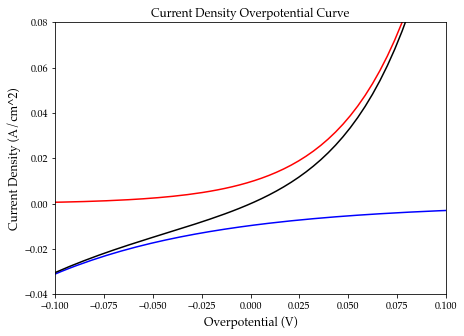

In [76]:
#Plotting for Current Density-Overpotential

fig = plt.figure(figsize = (7,5))

#Axis limits
#plt.xlim(min(Eta),max(Eta))
#plt.ylim(-600,600)
plt.xlim(-.1,.1)
plt.ylim(-.04,.08)


plt.plot(Eta,CurrentDensitya, color = 'red')
plt.plot(Eta,CurrentDensityc, color = 'blue')
plt.plot(Eta,CurrentDensitya+CurrentDensityc, color = 'black')

#Font selection
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

#Plot Labeling
plt.title('Current Density Overpotential Curve')
plt.xlabel('Overpotential (V)', fontsize = '12')
plt.ylabel('Current Density (A/cm^2)', fontsize = '12')



## Tafel Plot

In [88]:
#Deriving log of current density
CurrentDensityTotal = CurrentDensitya+CurrentDensityc
logja = np.log10(CurrentDensitya)
TafelCurrentDensityc = -CurrentDensityc
logjc = np.log10(TafelCurrentDensityc)
logjc


array([ 2.77815125,  2.75893833,  2.73972541,  2.72051249,  2.70129956,
        2.68208664,  2.66287372,  2.6436608 ,  2.62444788,  2.60523496,
        2.58602203,  2.56680911,  2.54759619,  2.52838327,  2.50917035,
        2.48995743,  2.4707445 ,  2.45153158,  2.43231866,  2.41310574,
        2.39389282,  2.3746799 ,  2.35546698,  2.33625405,  2.31704113,
        2.29782821,  2.27861529,  2.25940237,  2.24018945,  2.22097652,
        2.2017636 ,  2.18255068,  2.16333776,  2.14412484,  2.12491192,
        2.10569899,  2.08648607,  2.06727315,  2.04806023,  2.02884731,
        2.00963439,  1.99042147,  1.97120854,  1.95199562,  1.9327827 ,
        1.91356978,  1.89435686,  1.87514394,  1.85593101,  1.83671809,
        1.81750517,  1.79829225,  1.77907933,  1.75986641,  1.74065348,
        1.72144056,  1.70222764,  1.68301472,  1.6638018 ,  1.64458888,
        1.62537595,  1.60616303,  1.58695011,  1.56773719,  1.54852427,
        1.52931135,  1.51009843,  1.4908855 ,  1.47167258,  1.45

Text(0, 0.5, 'Current Density (A/cm^2)')

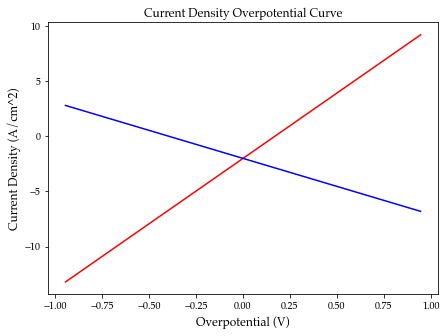

In [90]:
#Plotting for Tafel Plot

fig = plt.figure(figsize = (7,5))

#Axis limits
#plt.xlim(min(Eta),max(Eta))
#plt.ylim(-600,600)
#plt.xlim(-.1,.1)
#plt.ylim(-.04,.08)


plt.plot(Eta,logja, color = 'red')
plt.plot(Eta,logjc, color = 'blue')
#plt.plot(Eta,CurrentDensitya+CurrentDensityc, color = 'black')

#Font selection
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

#Plot Labeling
plt.title('Current Density Overpotential Curve')
plt.xlabel('Overpotential (V)', fontsize = '12')
plt.ylabel('Current Density (A/cm^2)', fontsize = '12')